# **Pertemuan 7: Sampling Distribution**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

# Table of Contents
- [A. Chebyshev Theorem](#a)
- [B. Law of Large Number Theorem](#a)
- [C. Central Limit Theorem](#a)

## **A. Chebyshev Theorem**<a class="anchor" id="a"></a>
<hr>
Misalkan kita memiliki suatu random variable \(X\) yang memiliki rata-rata \(\mu\) dan standar deviasi \(\sigma\), maka untuk setiap \(K > 0\),

$K$ suatu konstanta berlaku hubungan,

$$
P(|X - \mu| \geq K\sigma) \leq \frac{1}{K^2}.
$$

$$
P(|X - \mu| < K\sigma) \geq 1 - \frac{1}{K^2}.
$$

Teorema Chebyshev menyatakan bahwa untuk sembarang distribusi dengan varians terdefinisi, setidaknya $1 - \frac{1}{K^2}$ dari seluruh data akan berada dalam $k$ standar deviasi dari rata-ratanya.

**Contoh:**

* Misalkan kita memiliki data terkait pohon-pohon di hutan. 
* Rata-rata tingginya 15 meter dan standar deviasinya 3 meter.
* Kita ingin mengetahui berapa kemungkinan bahwa pohon-pohon itu memiliki tinggi diantara 9 meter s.d. 18 meter +/- 2 standar deviasi).

$$
\Huge
\begin{align*}
P(|X - 15| < (2\cdot3)) &\geq 1 - \frac{1}{2^2}.\\
P(|X - 15| < 6) &\geq 1 - \frac{1}{2^2}\\
P(9<X<21) &\geq \frac{3}{4}\\
\end{align*}
$$

In [91]:
# Menggunakan Teorema Chebyshev untuk menghitung probabilitas
# Data tinggi pohon di hutan
mean_height <- 15  # Rata-rata tinggi pohon (meter)
sd_height <- 3      # Standar deviasi tinggi pohon (meter)

# Rentang yang ingin kita analisis (+/- 2 standar deviasi)
k <- 2
lower_bound <- mean_height - k * sd_height  # 15 - 2*3 = 9 meter
upper_bound <- mean_height + k * sd_height  # 15 + 2*3 = 21 meter

# Teorema Chebyshev menyatakan bahwa setidaknya (1 - 1/k^2) dari data
# akan berada dalam k standar deviasi dari mean
probability <- 1 - (1 / k^2)

# Hasil
cat("Setidaknya", probability * 100, "% dari pohon memiliki tinggi antara", lower_bound, "dan", upper_bound, "meter.\n")

Setidaknya 75 % dari pohon memiliki tinggi antara 9 dan 21 meter.


Sebaliknya, jika kita tahu probabilitasnya $P(|X - \mu| < K\sigma)$, kita juga bisa mencari nilai $k$ yang memberikan nilai probabilitas sedemikian rupa.

Misalkan nilai $P(|X - \mu| < K\sigma)=y$ dan kita tahu bahwa $0 \leq y \leq 1$.

$$
\begin{align*}
P(|X - \mu| < K\sigma) &\geq 1 - \frac{1}{K^2}\\
y &\geq 1 - \frac{1}{K^2}\\
1-y &\leq \frac{1}{K^2}\\
{K^2} (1-y) &\leq 1 \\
{K^2} &\leq \frac{1}{1-y}\\
K &\leq \sqrt \frac{1}{1-y}
\end{align*}
$$

Apabila soal di atas kita balikkan kembali, maka dapat dilihat bahwa nilai $K$ yang memenuhi tepat $2$.

In [92]:
y <- 0.75  # Contoh probabilitas
K <- sqrt(1 / (1 - y))
cat("Nilai K yang memenuhi adalah:", K, "\n")

Nilai K yang memenuhi adalah: 2 


## Pembuktian Empiris

Berdasarkan informasi dari chat gpt, untuk suatu distribusi yang berbentuk eksponensial
* Probabilitas suatu random variabel $X$ berada di rentang $1\sigma = 86.47%$
* Probabilitas suatu random variabel $X$ berada di rentang $2\sigma= 95.02%$

Mari kita lihat apakah secara empiris, formula dari chebyshev mampu memberikan solusi/jaminan yang mirip.

In [49]:
# Exponential Data Generator in R

# Buat sebuah fungsi untuk menggenerate data sebanyak n data 
# Data yang digenerate berbentuk berdistribusi eksponensial dengan parameter n dan Lambda
set.seed(2025)
lambda = 0.5
n = 100000
generate_exponential_data <- function(n, lambda) {
  data <- rexp(n, rate = lambda)
}
exp_data <- generate_exponential_data(n = n, lambda = lambda)
rata_rata<-mean(exp_data)
stdev<-sd(exp_data)
head(exp_data)

[1] 0.93048062 2.07726819 1.12113809 0.01700864 0.17724145 0.27812422

In [50]:
cat("Rata-Rata", rata_rata,"\n")
cat("Standar Deviasi", stdev)

Rata-Rata 1.997856 
Standar Deviasi 2.00467

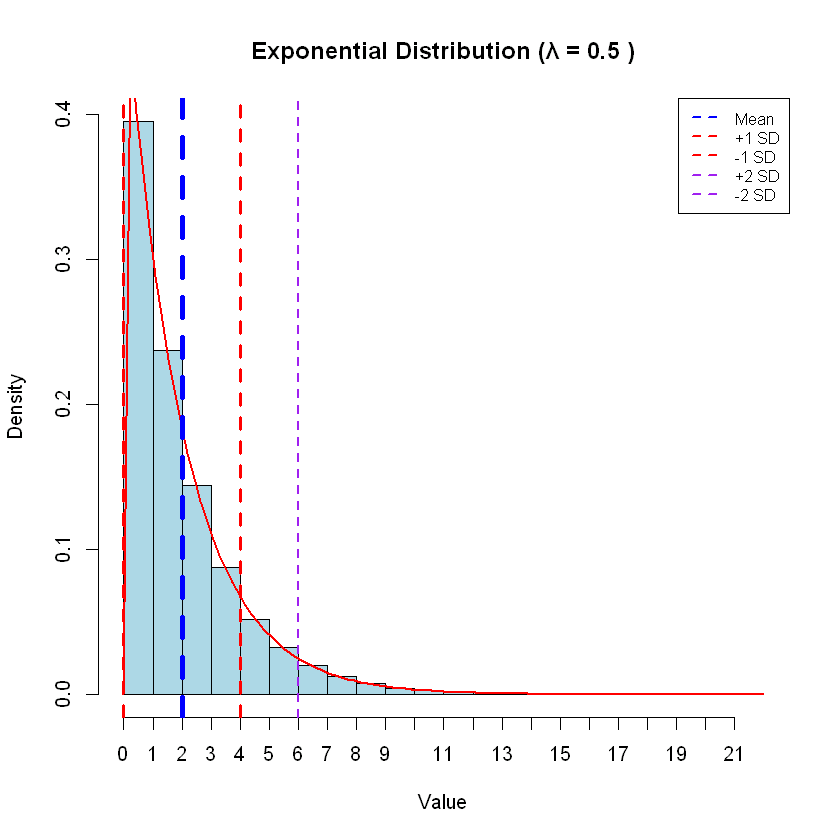

In [51]:
plot_exp_hist <- function(exp_data, lambda) {
  # Calculate statistics
  rata_rata <- mean(exp_data)
  stdev <- sd(exp_data)
  
  # Define x-axis breaks every 1 unit
  x_breaks <- seq(0, max(exp_data), by = 1)
  
  # Plot histogram
  hist(exp_data, breaks = 30, probability = TRUE, col = "lightblue", border = "black",
       main = paste("Exponential Distribution (λ =", lambda, ")"),
       xlab = "Value", ylab = "Density", axes = FALSE)  # Disable default axes
  axis(1, at = x_breaks)  # Manually add x-axis ticks at every 1 unit
  axis(2)  # Keep default y-axis

  # Overlay the theoretical exponential density curve
  curve(dexp(x, rate = lambda), col = "red", lwd = 2, add = TRUE)

  # Add vertical lines for mean, ±1 std, ±2 std
  abline(v = rata_rata, col = "blue", lwd = 4, lty = 2)  # Mean
  abline(v = rata_rata + stdev, col = "red", lwd = 3, lty = 2)  # +1 std
  abline(v = rata_rata - stdev, col = "red", lwd = 3, lty = 2)  # -1 std
  abline(v = rata_rata + 2 * stdev, col = "purple", lwd = 2, lty = 2)  # +2 std
  abline(v = rata_rata - 2 * stdev, col = "purple", lwd = 2, lty = 2)  # -2 std

  # Add legend
  legend("topright", legend = c("Mean", "+1 SD", "-1 SD", "+2 SD", "-2 SD"), 
         col = c("blue", "red", "red", "purple", "purple"), 
         lwd = 2, lty = 2, cex = 0.8, bg = "white")
}

plot_exp_hist(exp_data, lambda)

Misalkan kita ingin membuktikan bahwa  benar melalui Chebyshev Theorem bahwa terlepas dari bentuk distribusinya, peluang dari $P(|X-\mu|< K \sigma) \geq 1-\frac{1}{K}$

In [95]:
# Define k values
k_values <- c(1, 2, 3)

# Calculate empirical probabilities
empirical_probs <- sapply(k_values, function(k) {
  lower_bound <- rata_rata - k * stdev
  upper_bound <- rata_rata + k * stdev
  proportion <- mean(exp_data >= lower_bound & exp_data <= upper_bound) 
  #sum(exp_data >= lower_bound & exp_data <= upper_bound) / length(exp_data)
  return(proportion)
})

# Compute theoretical lower bounds from Chebyshev's theorem
chebyshev_bounds <- 1 - (1 / k_values^2)

# Combine results into a dataframe
result_df <- data.frame(
  k = k_values,
  Probability_Empiris = empirical_probs,
  Probability_Chebyshev = chebyshev_bounds
)

# Display results
print(result_df)


  k Probability_Empiris Probability_Chebyshev
1 1             0.86510             0.0000000
2 2             0.94931             0.7500000
3 3             0.98139             0.8888889


* Kita bisa melihat bahwa probability yang dijamin chebyshev theorem lebih konservatif daripada probability empiris.

## **B. Law of Large Number Theorem**<a class="anchor" id="a"></a>
<hr>

Misalkan $X_1, \ldots, X_n$ be a set of pairwise independent random variables with 
* $E(X_i) = \mu$, and
* $\text{Var}(X_i) = \sigma^2$.

Maka untuk setiap $c > 0$,

$$
P(\mu - c \leq X \leq \mu + c) \geq 1 - \frac{\sigma^2}{nc^2}
$$

dan seiring $n \to \infty$, probabilitasnya akan menjadi $1$. 

Sejalan dengan itu,
$$
P\left(\frac{|S_n - \mu|}{n} < \epsilon\right) \to 1 \text{ as } n \to \infty.
$$

Dimana, $\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$ dan $S_n = \sum_{i=1}^n X_i$.

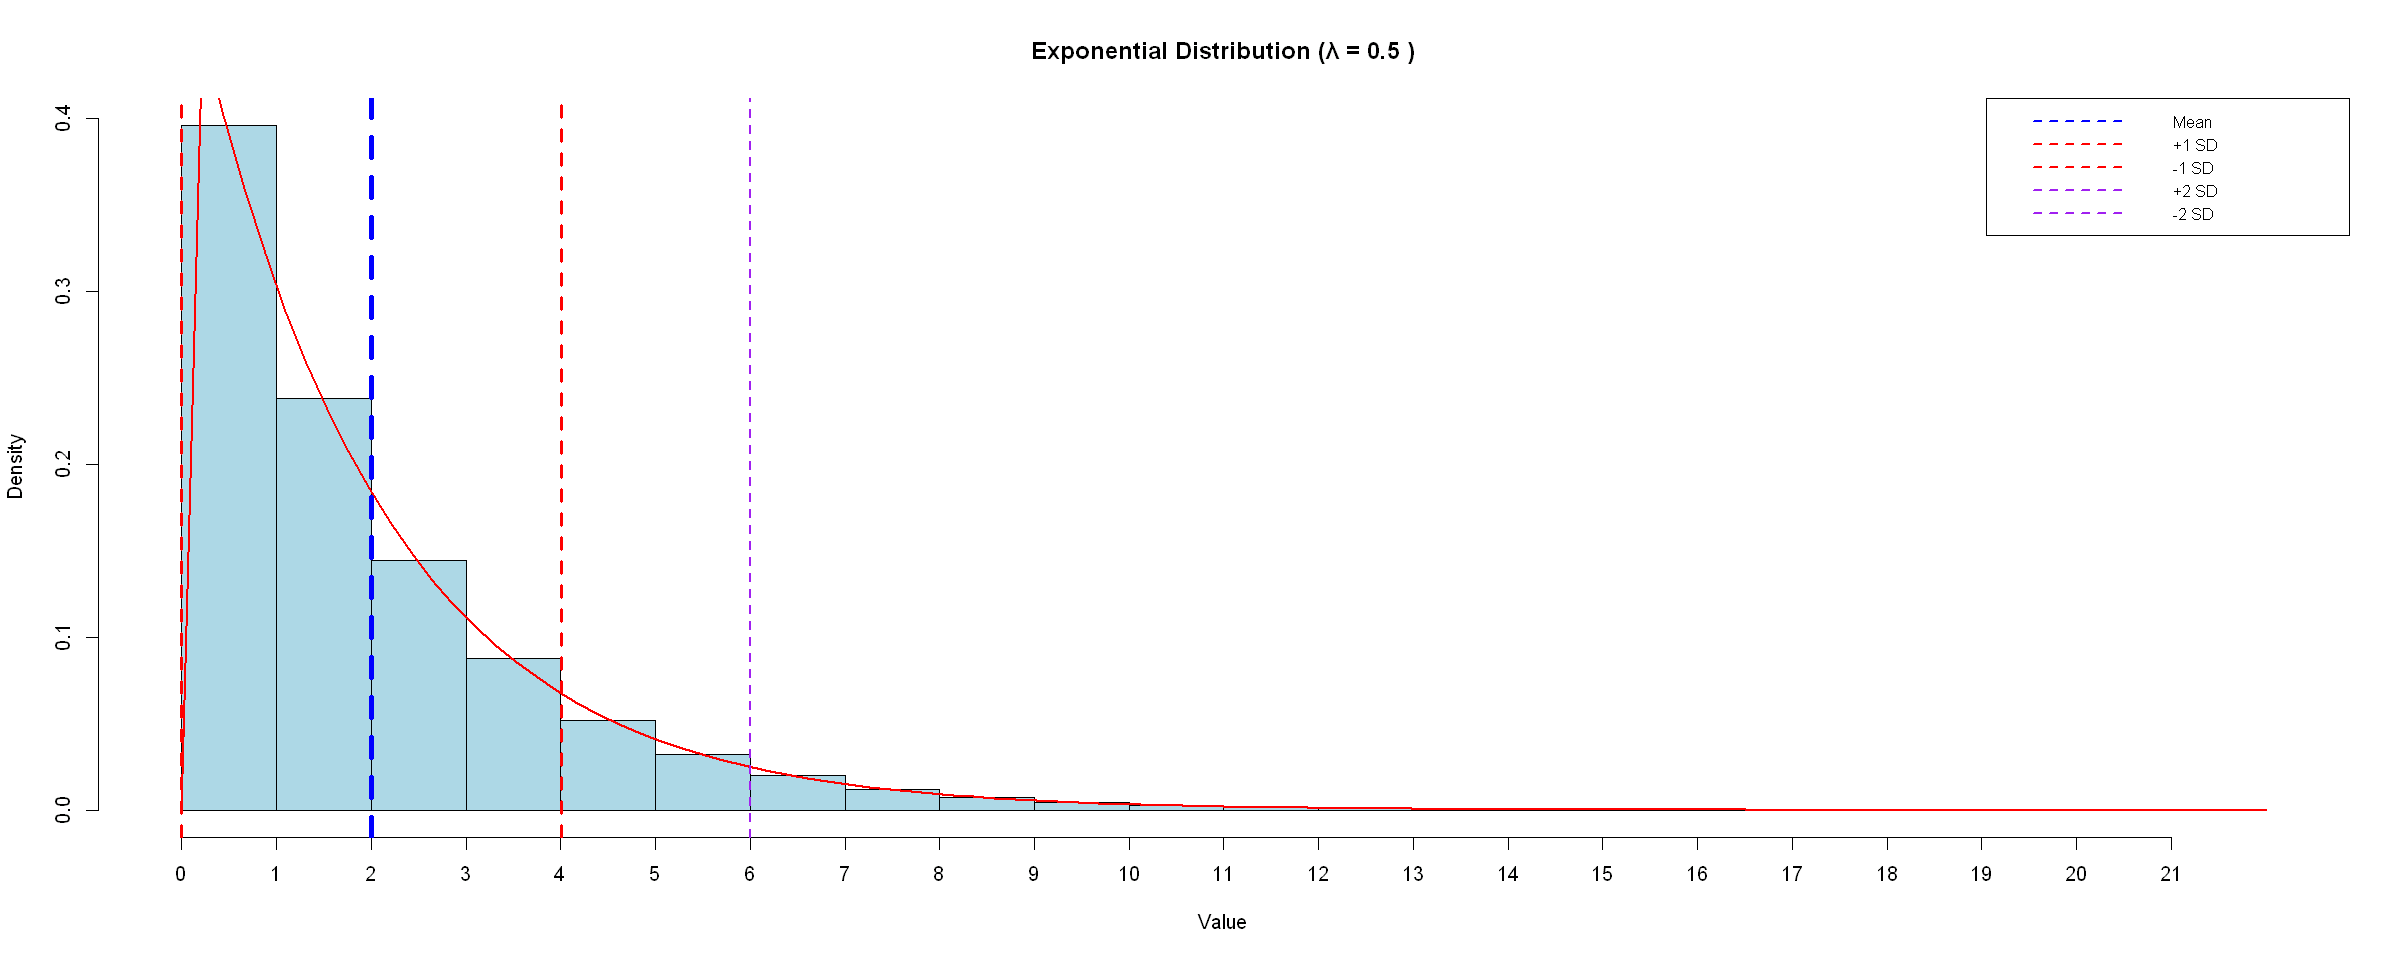

In [88]:
plot_exp_hist(exp_data, lambda)

Dari 100000 data yang berdistribusi eksponenasial yang kita punya tadi :

* Kita ambil sample dengan jumlah yang bervariasi, tunjukkan bahwa dengan meningkatnya nilai $n$ (jumlah sample), 
* maka rata-rata dari sample yang kita ambil akan mendekati rata-rata populasi.

Rata-rata dari sample size 100 : 2.026188 
Rata-rata dari sample size 500 : 2.076566 
Rata-rata dari sample size 700 : 1.971024 
Rata-rata dari sample size 1000 : 1.946993 
Rata-rata dari sample size 5000 : 1.993105 
Rata-rata dari sample size 8000 : 2.000542 
Rata-rata dari sample size 10000 : 2.020792 
Rata-rata dari sample size 20000 : 1.98593 
Rata-rata dari sample size 30000 : 1.992286 
Rata-rata dari sample size 40000 : 1.999945 


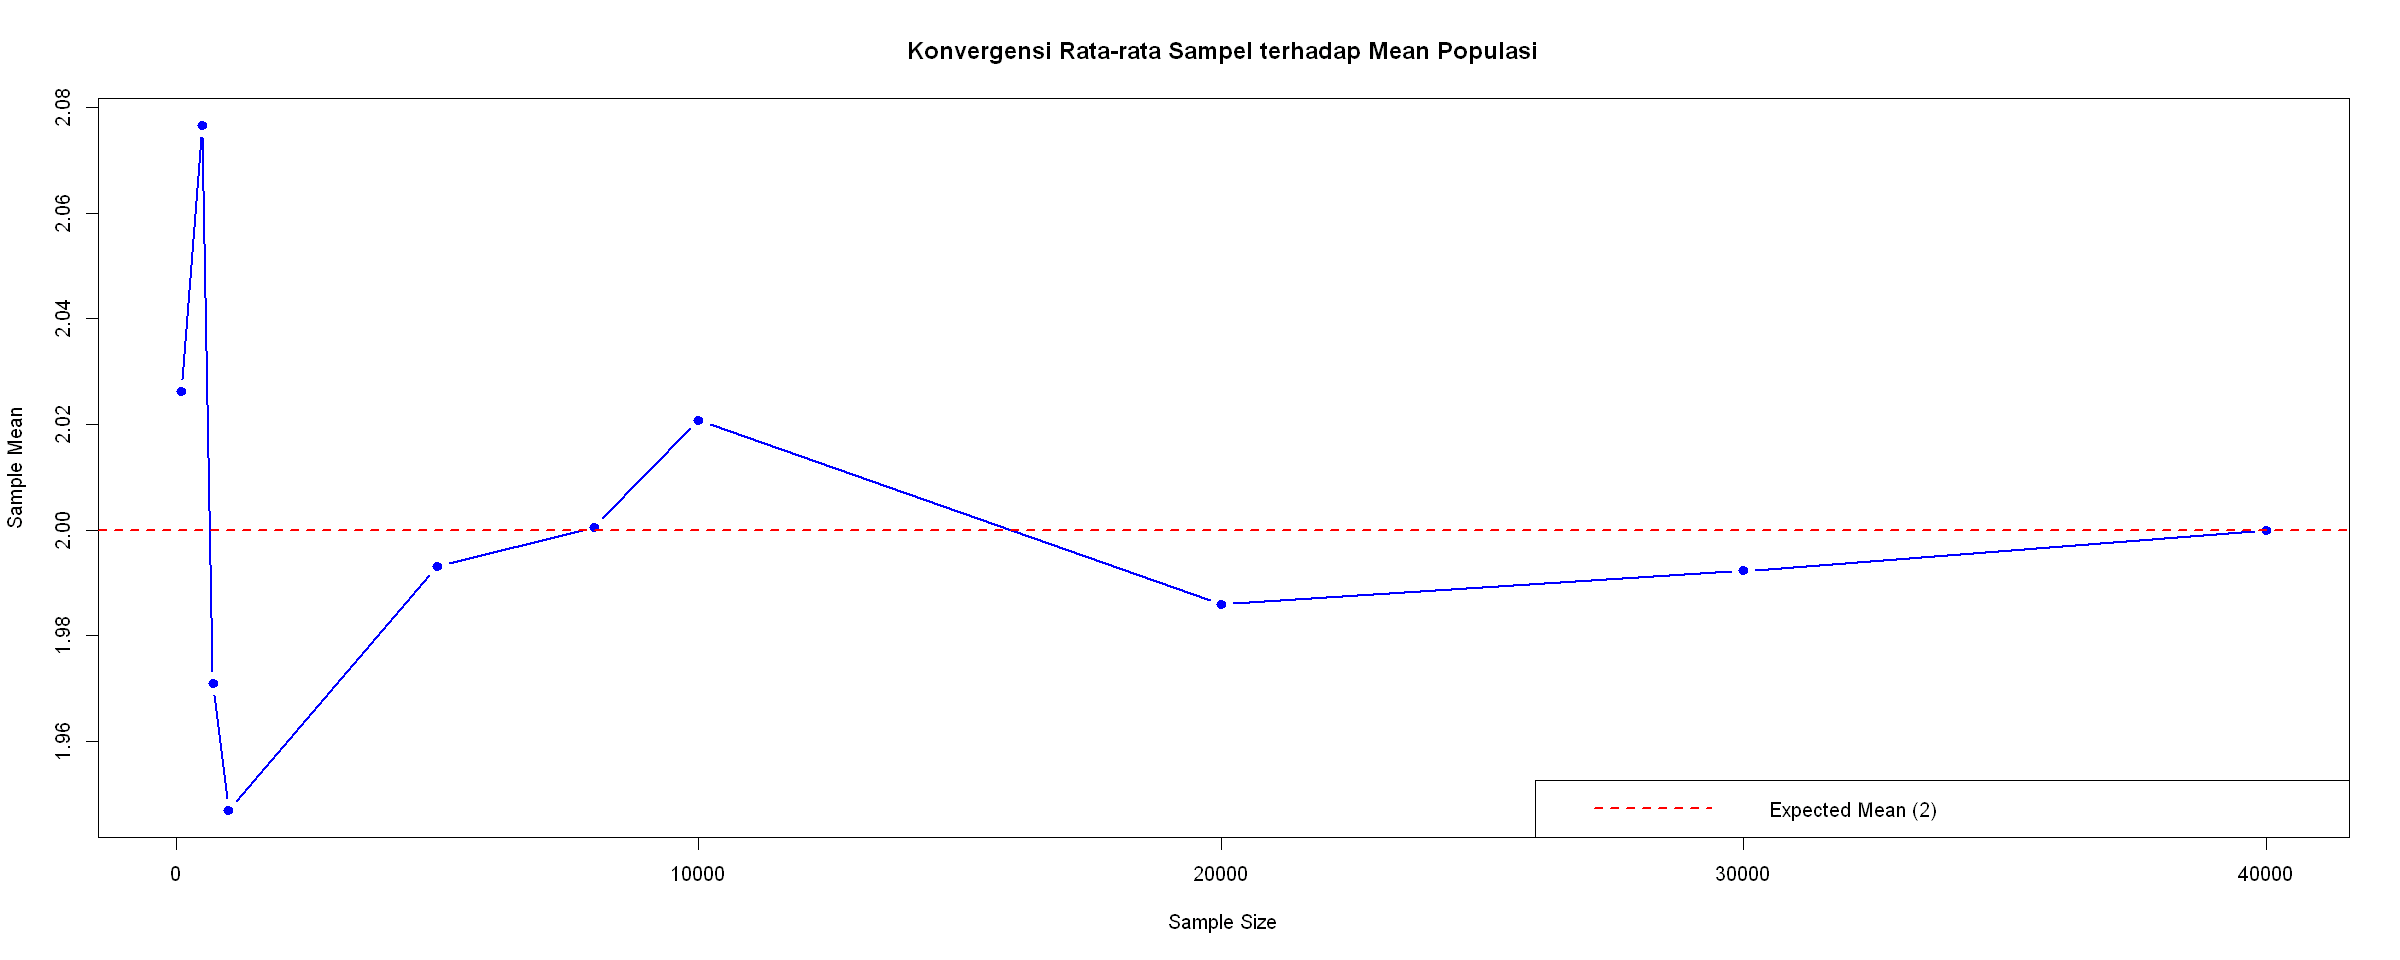

In [97]:
set.seed(2025)  # Seed untuk reproducibility
sample_sizes <- c(100, 500, 700, 1000, 5000, 8000, 10000, 20000, 30000, 40000)  # Ukuran sampel yang berbeda

# Ambil satu sampel untuk tiap sample size dan hitung rata-ratanya
sample_means <- sapply(sample_sizes, function(size) mean(sample(exp_data, size = size, replace = TRUE)))

# Tampilkan hasil
for (i in seq_along(sample_sizes)) {
  cat("Rata-rata dari sample size", sample_sizes[i], ":", sample_means[i], "\n")
}

# Visualisasi hasil dengan plot
plot(sample_sizes, sample_means, type = "b", col = "blue", pch = 19, lwd = 2,
     main = "Konvergensi Rata-rata Sampel terhadap Mean Populasi",
     xlab = "Sample Size", ylab = "Sample Mean")
abline(h = 1/lambda, col="red", lwd=2, lty=2)  # Garis mean ekspektasi (2)
legend("bottomright", legend=c("Expected Mean (2)"), col=c("red"), lwd=c(2), lty=c(2))


## **C. Central Limit Theorem**<a class="anchor" id="a"></a>
<hr>





Apabila $X_1, \ldots, X_n$ merupakan suatu sample acak dari populasi tak berhingga dengan mean $\mu < \infty$ dan varians $\sigma^2 < \infty$, 

distribusi dari $Z_n = \frac{(\overline{X} - \mu)}{(\sigma / \sqrt{n})}$) dengan $n \to \infty$ adalah probabilitas distribusi normal standar. Yakni, 

$$
\lim_{n \to \infty} P(Z_n \leq z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^z e^{-t^2/2} dt.
$$


Dengan kata lain apabila kita mengambil jumlah sample yang cukup besar dari suatu populasi, "rata-rata dari sampel tersebut diaproksimasikan terdistribusi normal, tanpa memandang distribusi asli dari data populasi".

Yang akan kita simulasikan :
* Dari data sebelumnya, kita mengetahui dengan jelas bahwa distribusinya adalah **exponential distribution**.
* Kita mengambil jumlah sampel tertentu kemudian merata-ratakannya, 
* maka rata-rata dari pengambilan sampel yang kita lakukan akan berbentuk probability distribusi normal.

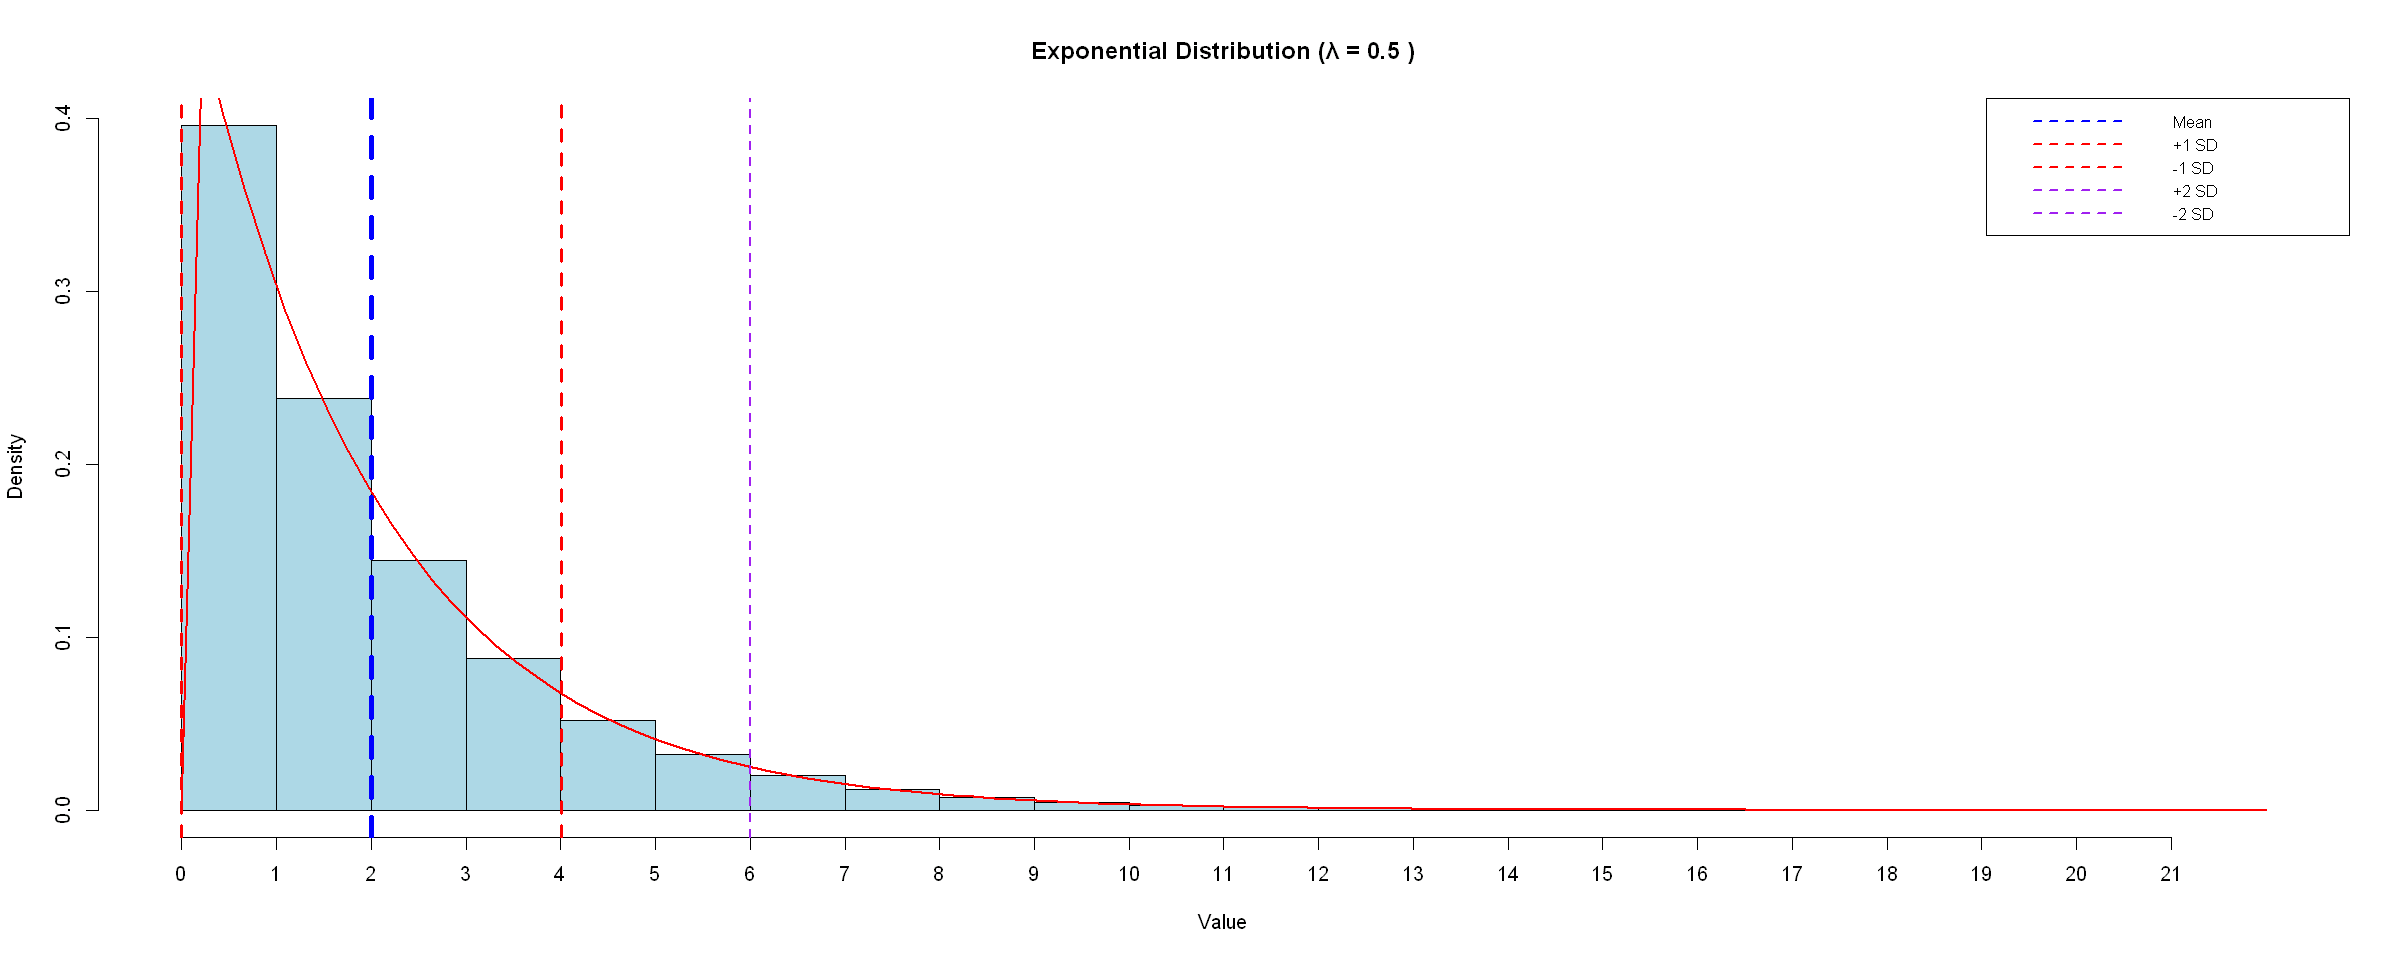

In [89]:
plot_exp_hist(exp_data, lambda)

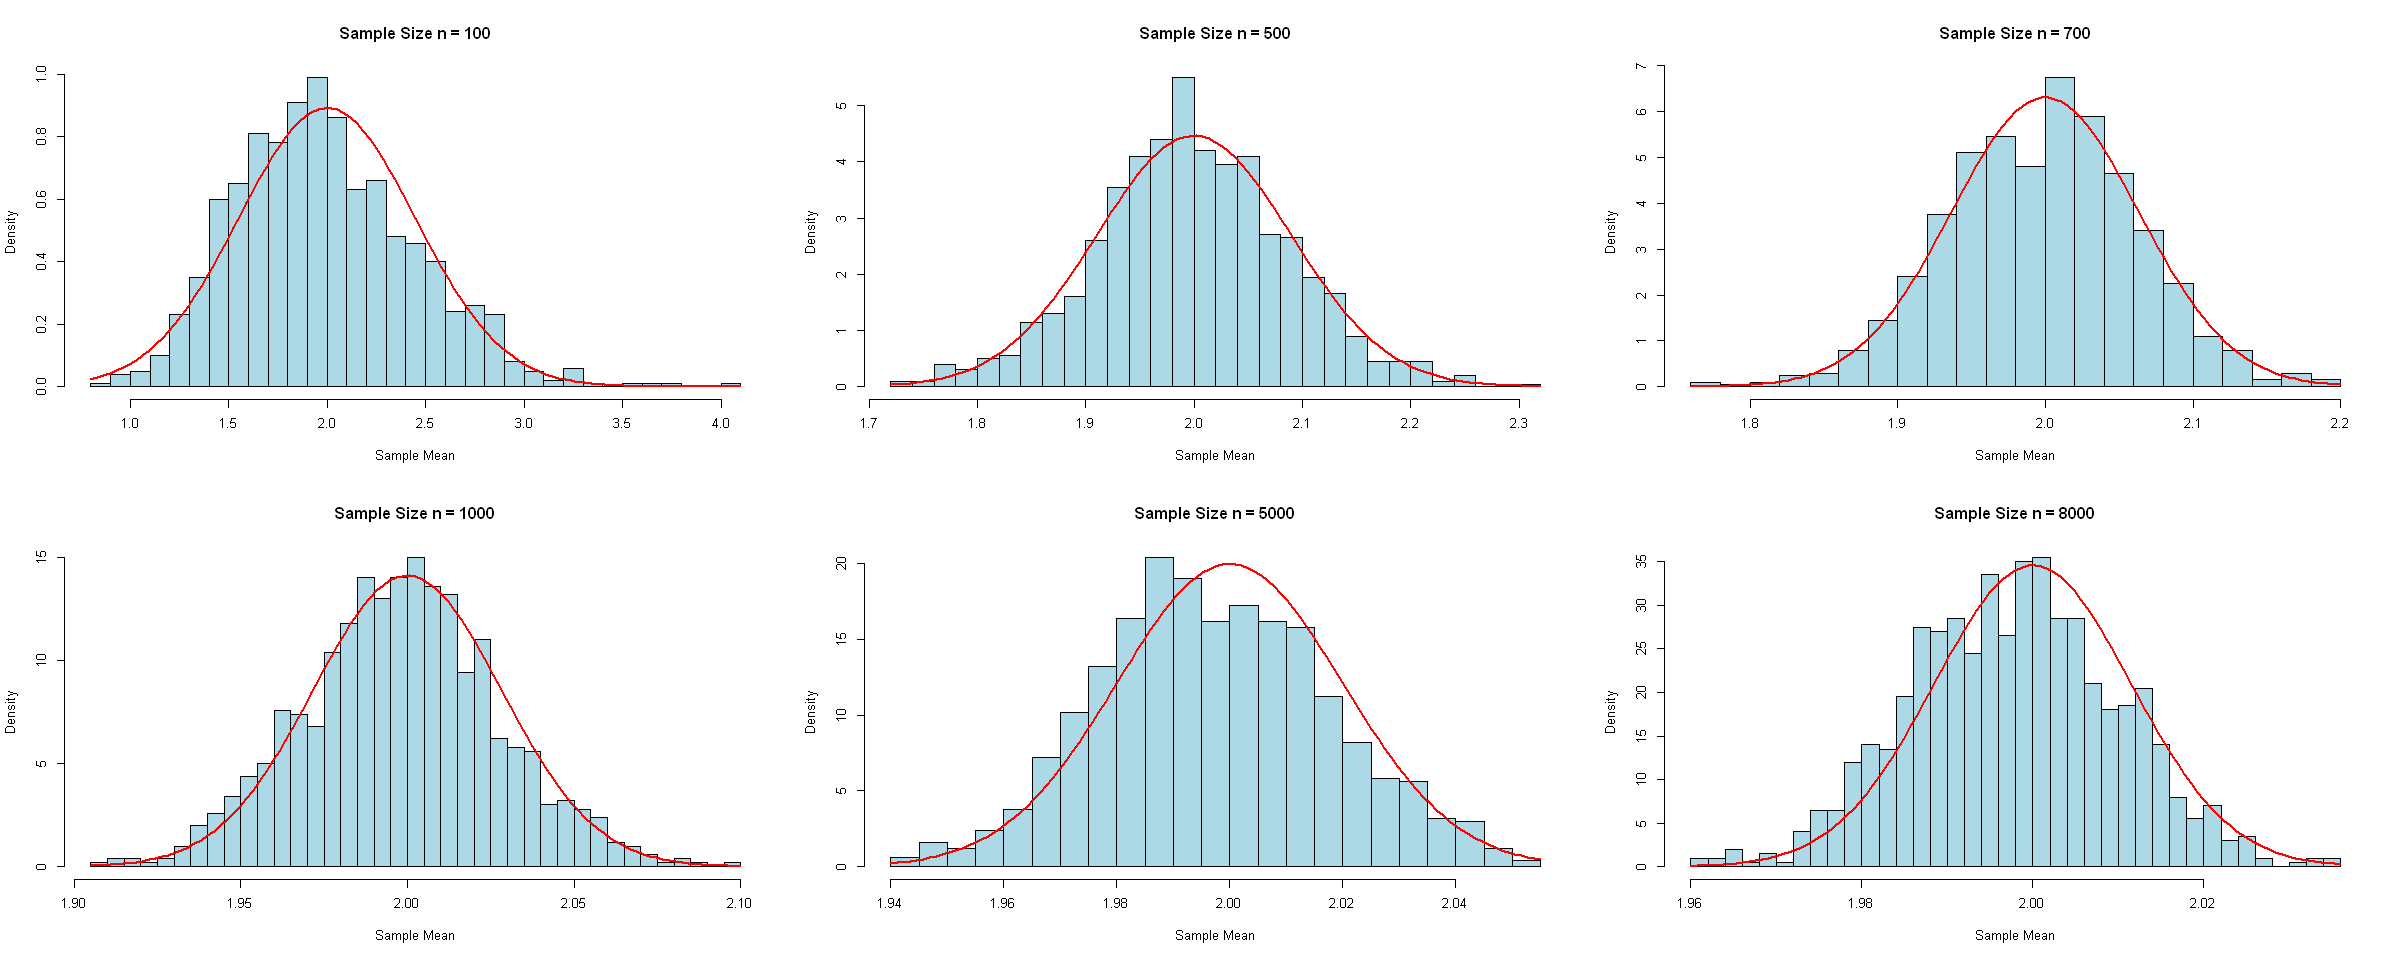

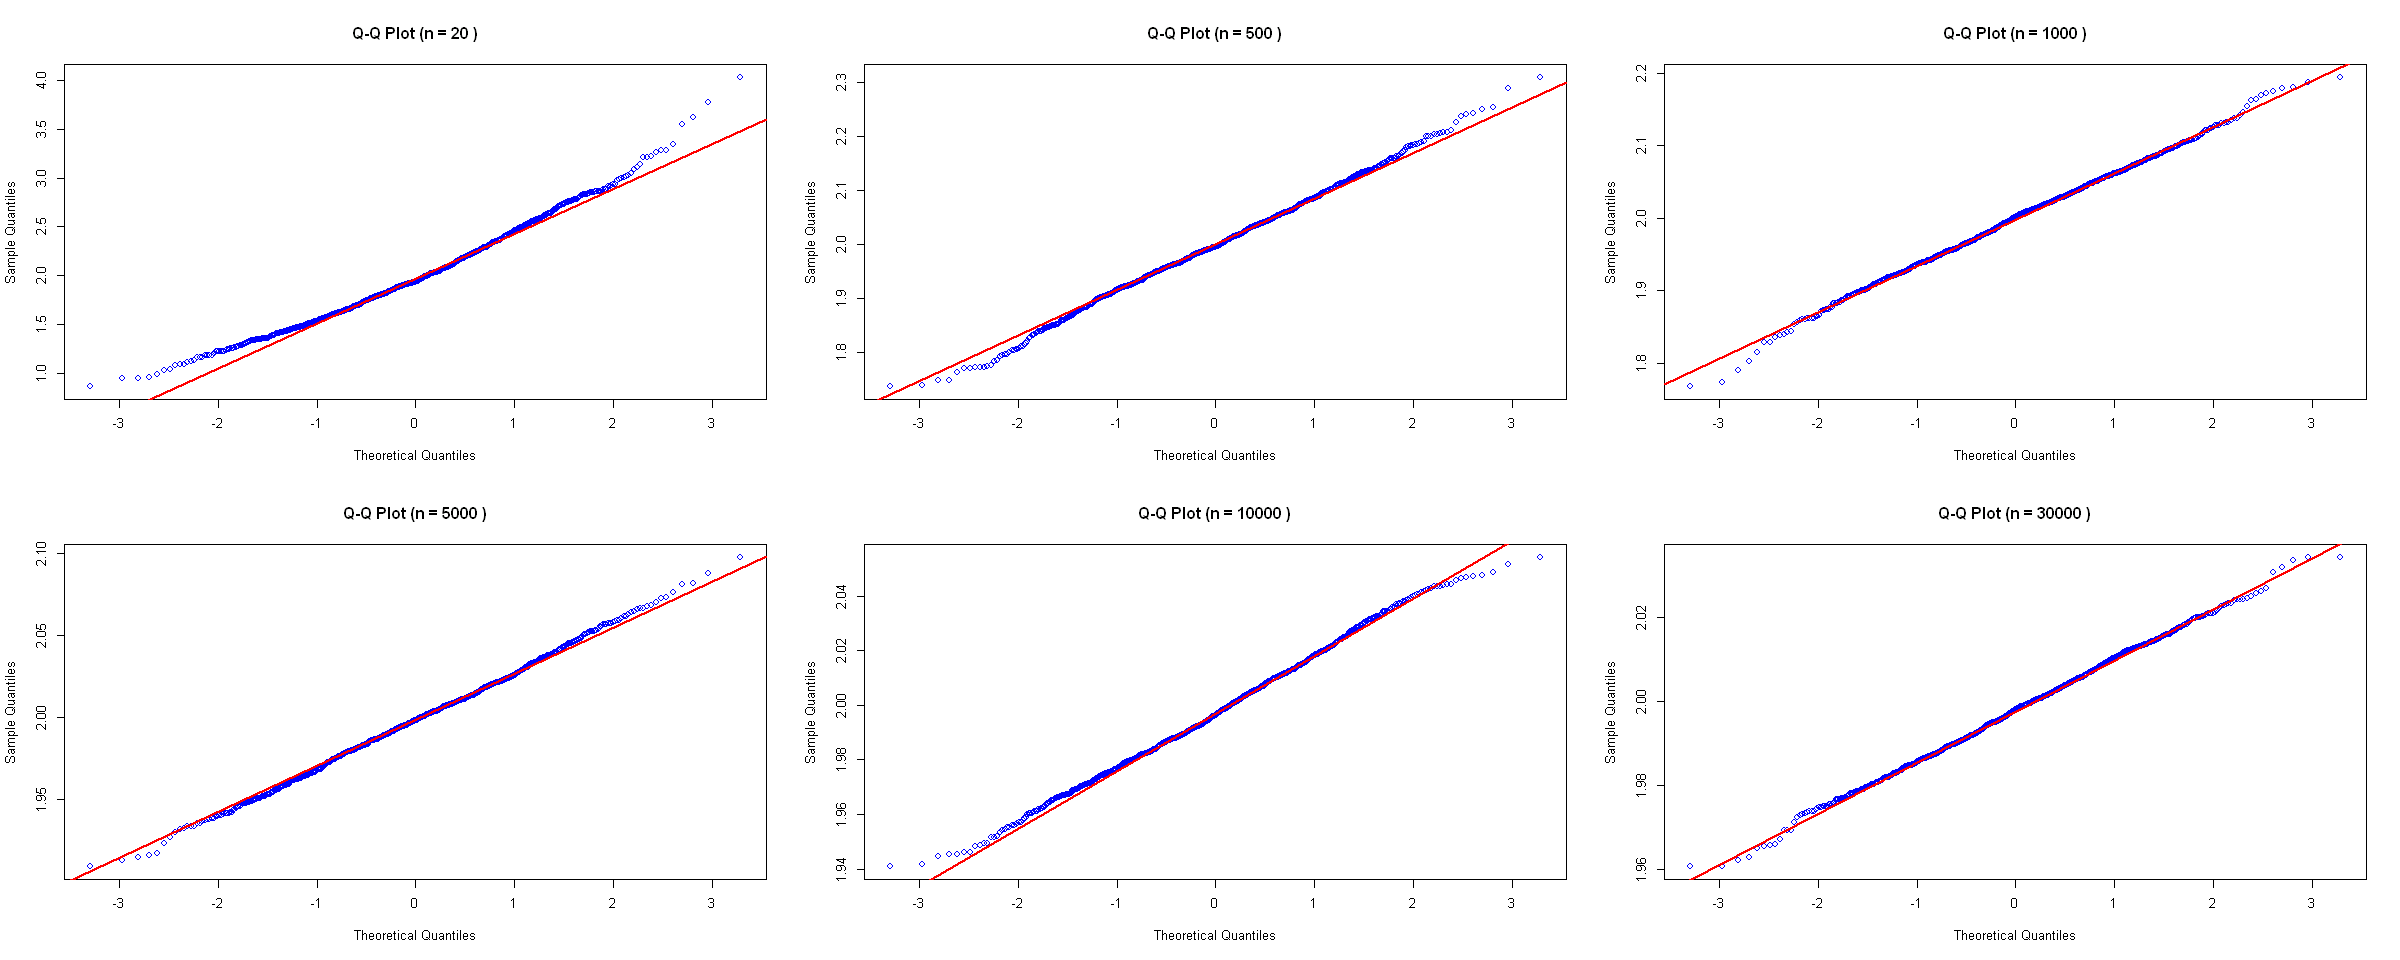

In [98]:
sample_sizes2 <- c(20, 500, 1000, 5000, 10000, 30000)  # Different sample sizes to test CLT

# Generate sample means for different sample sizes
sample_means_list <- lapply(sample_sizes2, function(n) {
  replicate(num_samples, mean(sample(exp_data, n, replace = TRUE))) 
})

# Plot histograms of sample means for different sample sizes
par(mfrow=c(2,3))  # Set layout for multiple plots

for (i in seq_along(sample_sizes2)) {
  hist(sample_means_list[[i]], breaks = 30, probability = TRUE, col = "lightblue", border = "black",
       main = paste("Sample Size n =", sample_sizes[i]),
       xlab = "Sample Mean", ylab = "Density")
  
  # Overlay normal distribution with same mean and standard deviation
  mu <- 1/lambda  # Expected mean
  sigma <- (1/lambda) / sqrt(sample_sizes2[i])  # Expected standard deviation from CLT
  curve(dnorm(x, mean = mu, sd = sigma), col = "red", lwd = 2, add = TRUE)
}

par(mfrow=c(1,1))  # Reset plotting layout

# ---- Q-Q Plots to Check Normality ----
par(mfrow=c(2,3))  # Set layout for multiple plots

for (i in seq_along(sample_sizes2)) {
  qqnorm(sample_means_list[[i]], main = paste("Q-Q Plot (n =", sample_sizes2[i], ")"), col = "blue")
  qqline(sample_means_list[[i]], col = "red", lwd = 2)  # Add normal reference line
}

par(mfrow=c(1,1))  # Reset plotting layout


In [100]:
#################################################################### END #########################################################################################################